<a href="https://colab.research.google.com/github/tom99763/cs224w/blob/main/lecture1~4_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NetworkX

In [206]:
import networkx as nx
import numpy as np

### Test G.add_node

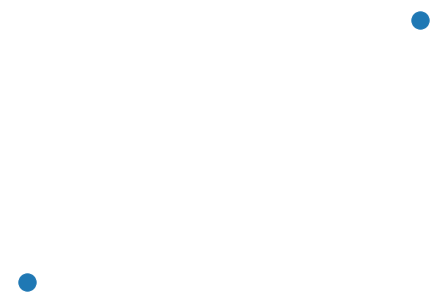

In [ ]:
G=nx.Graph()
G.add_node(0) #index:0
G.add_node(1)#index:1
nx.draw(G)

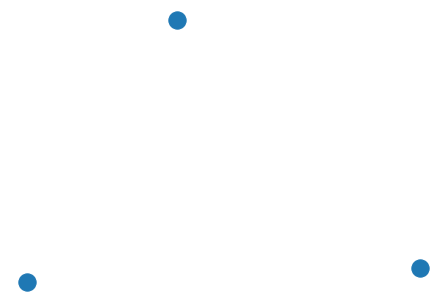

In [ ]:
G.add_node(2)#index:2
nx.draw(G)

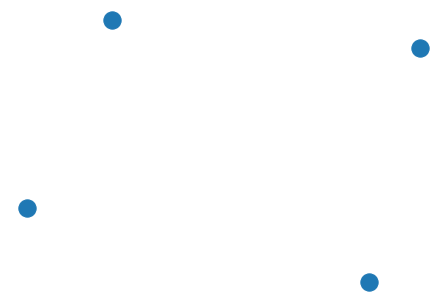

In [ ]:
G.add_node(5)#index:5
nx.draw(G)

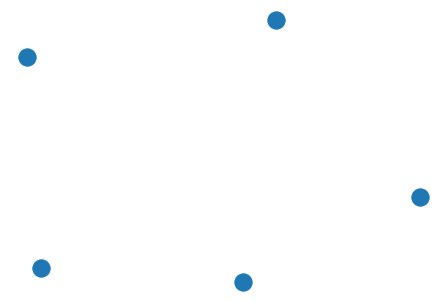

In [ ]:
G.add_node(3)#index:3
nx.draw(G)

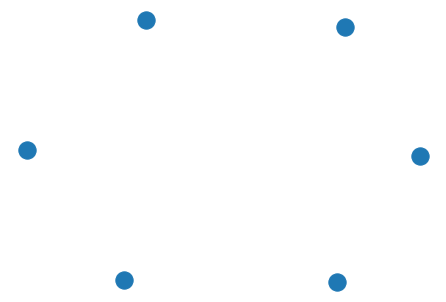

In [ ]:
G.add_node(4)#index:4
nx.draw(G)

### Test G.add_nodes_from

In [ ]:
G=nx.Graph()

In [ ]:
G.add_node(0)

In [ ]:
G.add_nodes_from([1,2]) #add node at index 0 and 1, add multiple nodes

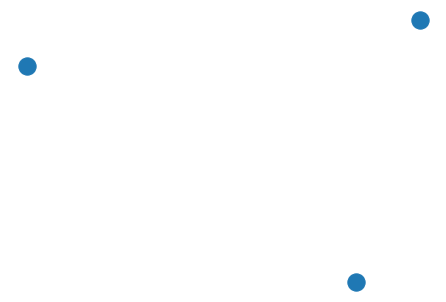

In [ ]:
nx.draw(G)

### SubGraph merge

False


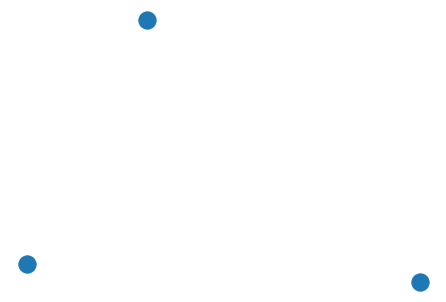

In [ ]:
G1=nx.Graph()
print(G.is_directed())
G1.add_node(0)
G1.add_nodes_from([1,2])
nx.draw(G1)

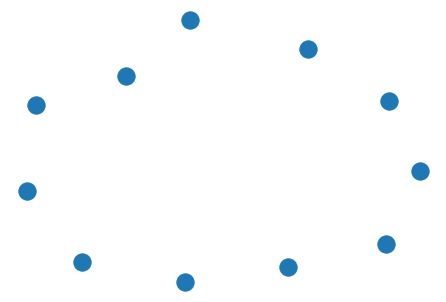

In [ ]:
H = nx.path_graph(10)
G.add_node(H)
nx.draw(G)

In [ ]:
#G.clear() #clean
#nx.draw(G)

###Edge

In [ ]:
G = nx.Graph()

In [ ]:
G.add_node(1)
G.add_nodes_from([2, 3])

In [ ]:
G.add_edges_from([(1,2),(1,3),(2,3)])

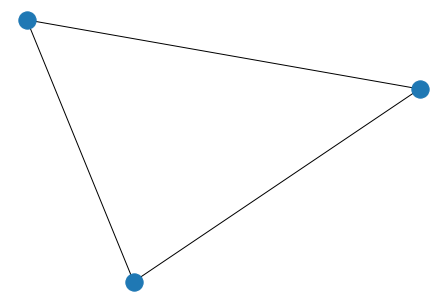

In [ ]:
nx.draw(G)

In [ ]:
G[1],G[2],G[3] # see links

(AtlasView({2: {}, 3: {}}),
 AtlasView({1: {}, 3: {}}),
 AtlasView({1: {}, 2: {}}))

In [ ]:
#add attribute, data

G[1][3]['color']='red' 

In [ ]:
G[1]

AtlasView({2: {}, 3: {'color': 'red'}})

### Adjancency matrix

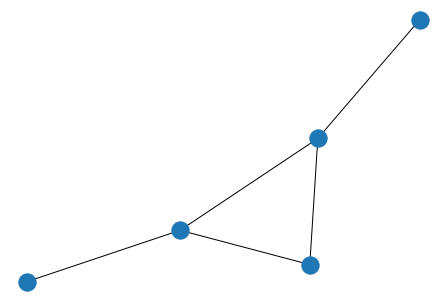

In [ ]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3,4,5])
G.add_edges_from([(1,2),(1,3),(2,3),(1,4),(2,5)])
nx.draw(G)

Adjacency Matrix

In [ ]:
M=nx.adj_matrix(G)
M.todense()

matrix([[0, 1, 1, 1, 0],
        [1, 0, 1, 0, 1],
        [1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]], dtype=int64)

In [ ]:
G.degree(1),G.degree(3)

(3, 2)

## Data : Karate Club Network

### Karate Club Network

In [34]:
G = nx.karate_club_graph()
G.is_directed()

False

In [ ]:
for i in range(20,26):
  print(G.nodes()[i])  #check class label

{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}


In [ ]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

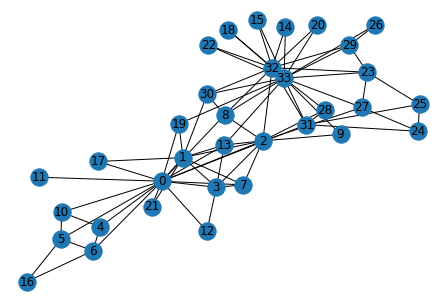

In [ ]:
nx.draw(G,with_labels=True)

####Q1:Average Degree

In [ ]:
#since it is undirected graph : 2*num of edges/num of nodes
2*G.number_of_edges()/G.number_of_nodes()

4.588235294117647

####Q2:Clustering Coefficient 

In [ ]:
#call function : nx.average_clustering(G)
#neighbor triangle count/combination for degree pick 2
#what is triangle : friend of friend also my friend

def combination(total_num,pick_num):
  if pick_num==total_num:
    return 1

  elif pick_num<0 or total_num<0 or total_num<pick_num:
    return 0
  else:
    return combination(total_num-1,pick_num)+combination(total_num-1,pick_num-1)

def avg_clustering_ceof(G):
  avg=0
  visited=[]
  for node in G.nodes():
    node_degree=nx.degree(G,node)
    combination_num=combination(node_degree,2) 

    #more detail--> use adjacency matrix to search neighbor of neighbor(triangle)
    triangle_num=0 
    neighbors=[nei for nei in G.neighbors(node)]
    for nei in neighbors: 
      for nei_nei in G.neighbors(nei):
        if nei_nei in neighbors:
          triangle_num+=1
    try:
      clustering_ceof=triangle_num/combination_num
    except:
      clustering_ceof=triangle_num
    
    avg+=clustering_ceof/G.number_of_nodes()

  ##n1->n2->n3 n1->n3->n2 is the same but!!!!! n2->n1->n3 is not the same series showing above!!!! because it compute a specific node's coef 
  #not a series coef, so they should be seen as the different series
  #that's why I divide 2
  return avg/2  

In [ ]:
avg_clustering_ceof(G) #function implement

0.5706384782076823

In [ ]:
nx.average_clustering(G) #call built-in function

0.5706384782076823

####Q3:PageRank for node 0 for 1 iteration

image.png

BM+(1-B)(1/N)

In [ ]:
import numpy as np

In [ ]:
#wtf this graph is undirected --> I think it is bidirected (廢話)
#so we don't need to spend time on link-in and link-out 

def pagerank(G, beta, r0, node_id,threshold):
  r=np.array([r0 for _ in range(G.number_of_nodes())])

  #compute expectation for transition matrix
  #since double directed --> each node row divided by its #edges
  M=np.array(nx.adj_matrix(G).todense())
  for idx,node_neis in enumerate(M):
    if idx==0:
      Google=np.where(M[idx,:]==1,1/nx.degree(G,idx),0)
    else:
      google=np.where(M[idx,:]==1,1/nx.degree(G,idx),0)
      Google=np.vstack([Google,google])

  G1=Google*beta
  G2=(1-beta)*np.ones_like(Google)*(1./G.number_of_nodes())
    

  Google=G1+G2

  while True:
    r_prev=r
    r=Google.T@r
    #l1 norm less than threshold --> convergence
    #very similar to transition state problem in RL
    if np.sum(np.abs(r-r_prev))<threshold: 
      break
  return r

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
threshold=1e-4 

#origin is 1 iteration, now we complete all pagerank algorithm without random walk since graph is small 
#compare to the function calll

r = pagerank(G, beta, r0, node,threshold)

r1=r[node]
print("The PageRank value for node 0 after one iteration is {}".format(r1))
print('function call:',nx.pagerank(G)[0])

The PageRank value for node 0 after one iteration is 0.09456451607247095
function call: 0.09700181758983709


In [ ]:
for i in range(G.number_of_nodes()):
  print(f'node_{i}:NodeDegree {nx.degree(G,i)}  ,PageRank {r[i]}')

node_0:NodeDegree 16  ,PageRank 0.09456451607247095
node_1:NodeDegree 9  ,PageRank 0.05152461404801788
node_2:NodeDegree 10  ,PageRank 0.05510961452083188
node_3:NodeDegree 6  ,PageRank 0.03520718169573565
node_4:NodeDegree 3  ,PageRank 0.02255727773362947
node_5:NodeDegree 4  ,PageRank 0.0296554774358259
node_6:NodeDegree 4  ,PageRank 0.0296554774358259
node_7:NodeDegree 4  ,PageRank 0.024292853576326375
node_8:NodeDegree 5  ,PageRank 0.0292028114727932
node_9:NodeDegree 2  ,PageRank 0.014917803346541293
node_10:NodeDegree 3  ,PageRank 0.02255727773362947
node_11:NodeDegree 1  ,PageRank 0.010610312687925276
node_12:NodeDegree 2  ,PageRank 0.015304573405348656
node_13:NodeDegree 5  ,PageRank 0.028919625963188766
node_14:NodeDegree 2  ,PageRank 0.01517937522245971
node_15:NodeDegree 2  ,PageRank 0.01517937522245971
node_16:NodeDegree 2  ,PageRank 0.017745207452508193
node_17:NodeDegree 2  ,PageRank 0.015189914840400567
node_18:NodeDegree 2  ,PageRank 0.01517937522245971
node_19:NodeDegr

In [ ]:
#function call
nx.pagerank(G)

{0: 0.09700181758983709,
 1: 0.05287839103742701,
 2: 0.057078423047636745,
 3: 0.03586064322306479,
 4: 0.021979406974834498,
 5: 0.02911334166344221,
 6: 0.02911334166344221,
 7: 0.024490758039509182,
 8: 0.029765339186167028,
 9: 0.014308950284462801,
 10: 0.021979406974834498,
 11: 0.009564916863537148,
 12: 0.014645186487916191,
 13: 0.029536314977202986,
 14: 0.014535161524273825,
 15: 0.014535161524273825,
 16: 0.016785378110253487,
 17: 0.014558859774243493,
 18: 0.014535161524273825,
 19: 0.019604416711937293,
 20: 0.014535161524273825,
 21: 0.014558859774243493,
 22: 0.014535161524273825,
 23: 0.03152091531163228,
 24: 0.021075455001162945,
 25: 0.021005628174745786,
 26: 0.015043395360629753,
 27: 0.025638803528350497,
 28: 0.01957296050943854,
 29: 0.02628726283711208,
 30: 0.02458933653429248,
 31: 0.03715663592267942,
 32: 0.07169213006588289,
 33: 0.1009179167487121}

Notice that some node have same NodeDegree but different PageRank Score since some valuable node contribute to a node which have same NodeDegree to some other nodes

####Q4:What is the (raw) closeness centrality for the karate club network node 5

In [ ]:
def closeness_centrality(G, node=5):
  clossness=0
  for i in range(G.number_of_nodes()):
    #if you want algorithm just try your self, I'm lazy 
    # my idea for this algorihm is to consider target as start, expression "start -> <- start"
    clossness+=nx.shortest_path_length(G,5)[i]  
  return 1/clossness

In [ ]:
closeness_centrality(G)

0.011627906976744186

####Q5:Getting the edge list of the karate club network and transform it into torch.LongTensor. What is the torch.sum value of pos_edge_index tensor

In [ ]:
edges_list=list(G.edges)
edges_list=torch.LongTensor(edges_list)

In [ ]:
edges_list.shape

torch.Size([78, 2])

In [ ]:
torch.sum(edges_list)

tensor(2535)

####Q6 : Please implement following function that samples negative edges. Then you will answer which edges (edge_1 to edge_5) can be negative ones in the karate club network

In [220]:
#negative edge : the unexisted link

#sampling from Graph

def sample_negative_edges(G, num_neg_samples):
  n=0
  neg=set()
  while n<num_neg_samples:
    node1=np.random.choice(range(0,G.number_of_nodes()-1))
    node2=np.random.choice(range(0,G.number_of_nodes()-1))
    #undirected graph so we don't cosider combination
    
    if not G.has_edge(node1,node2) and (node1,node2) not in neg:
      n+=1
      neg.add((node1,node2))
  return neg

In [222]:
sample_negative_edges(G,5)

{(4, 5), (5, 17), (22, 26), (23, 22), (26, 10)}

### Learning Node Embedding By Matrix Factorization

This is similar to LDA(supervised clustering) but unsupervied (the connectivity can be seen as label)

We want to learn a representation s.t.a Node which is connected densly to neighborbors should be the same group which means small euclidean distance iff high cosine similarity  


key idea : Cosine similarity of 2 Embeddings ~ 1 --> node1 node2 connected --> correspond index in adjacency matrix is 1

So we have two choices to design loss function : 
  
   * Directly use distance of cosine similarity of embbeddings  and adjacency matrix to compute loss, e.g. MSE

   * See entries in A as classification label, embedding dot product+sigmoid as prediction, e.g. BCE


Note : this topic discuss on lecture 4-4 


In [31]:
import torch
import torch.nn as nn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torch.optim import SGD


In [137]:
def train_embedding(G,lr,emb_dim,epochs):
  Emb=nn.Embedding(num_embeddings=G.number_of_nodes(),embedding_dim=emb_dim)
  
  adj_matrix=nx.adj_matrix(G).todense()
  adj_matrix=torch.tensor(adj_matrix,dtype=torch.float32)

  nodes=torch.arange(0,G.number_of_nodes())

  #optimize 
  optimizer=SGD(Emb.parameters(),lr=lr)
  loss_fnc=nn.MSELoss()

  for epoch in range(epochs):
    Z=Emb(nodes)
    Z=Z/torch.linalg.norm(Z,ord=2,dim=-1).unsqueeze(1)
    cosine_similarity=torch.matmul(Z,Z.t())
    cosine_similarity*=(torch.ones((34,34))-torch.eye(34)) #since no self link--> mask diagnal entries to 0
    loss=loss_fnc(cosine_similarity,adj_matrix)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%1000==0:
      print(loss)
  return Emb

embedding=train_embedding(G,1.0,16,20000)

tensor(0.1881, grad_fn=<MseLossBackward>)
tensor(0.0862, grad_fn=<MseLossBackward>)
tensor(0.0592, grad_fn=<MseLossBackward>)
tensor(0.0501, grad_fn=<MseLossBackward>)
tensor(0.0464, grad_fn=<MseLossBackward>)
tensor(0.0447, grad_fn=<MseLossBackward>)
tensor(0.0437, grad_fn=<MseLossBackward>)
tensor(0.0431, grad_fn=<MseLossBackward>)
tensor(0.0427, grad_fn=<MseLossBackward>)
tensor(0.0424, grad_fn=<MseLossBackward>)
tensor(0.0422, grad_fn=<MseLossBackward>)
tensor(0.0420, grad_fn=<MseLossBackward>)
tensor(0.0419, grad_fn=<MseLossBackward>)
tensor(0.0418, grad_fn=<MseLossBackward>)
tensor(0.0417, grad_fn=<MseLossBackward>)
tensor(0.0416, grad_fn=<MseLossBackward>)
tensor(0.0415, grad_fn=<MseLossBackward>)
tensor(0.0415, grad_fn=<MseLossBackward>)
tensor(0.0415, grad_fn=<MseLossBackward>)
tensor(0.0414, grad_fn=<MseLossBackward>)


PCA and Visualization

In [202]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi': 
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi",edgecolor='black',marker='s',s=50)
  plt.scatter(club2_x, club2_y, color="cyan", label="Officer",edgecolor='black',marker='s',s=50)
  plt.xlabel('component1')
  plt.ylabel('component2')
  plt.legend()
  plt.show()


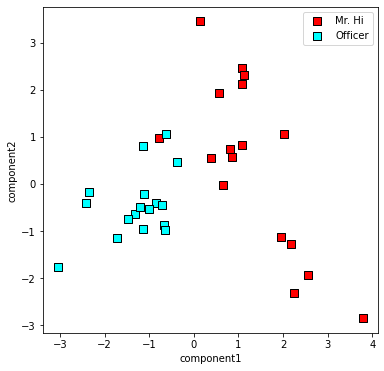

In [203]:
visualize_emb(embedding)

In [196]:
'''Discussion

Aij = 0 means that 2 nodes have no connection

which means their embeddings are orthogonal since our optimization 

is to minimize the distance of cosine similarity and entries in adj_matrix

cosine=0 --> 2 vectors orthogonal 

'''

#take node 0 and node 33

adj_matrix=np.array(nx.adj_matrix(G).todense())

print('node 0 :',G.nodes[0],'node 26:',G.nodes[26])

#since this graph is undirected --> symmetric--> just check one side index entry
print('check 2 node relation in adjacency matrix:',adj_matrix[0][26]) 

embs=embedding(torch.tensor([0,26]))

cosine_similarity=nn.CosineSimilarity(dim=0)

print(f'cosine score of 2 embeddings :{cosine_similarity(embs[0,:],embs[1,:])}')

node 0 : {'club': 'Mr. Hi'} node 26: {'club': 'Officer'}
check 2 node relation in adjacency matrix: 0
cosine score of 2 embeddings :-0.00706150708720088
